# **NUMERICAL TOOLS FOR QUANTITATIVE FINANCE -- Assignment**
---
<img src="../Imperial_logo.png" align = "left" width=200>
<br><br>
 
- Copyright (c) Antoine Jacquier, 2024. All rights reserved

- Author: Jack Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Finite differences

We consider a function $f:A\subset\mathbb{R}\to\mathbb{R}$, which we assume smooth enough.
A (local) Taylor expansion around a point $x\in\mathbb{R}$ reads
$$
f(x+\varepsilon) = f(x) + \varepsilon f'(x) + \mathcal{O}(\varepsilon^2),
$$
as $\varepsilon$ tends to zero.
Therefore
$$
f'(x) = \frac{f(x+\varepsilon) - f(x)}{\varepsilon}  + \mathcal{O}(\varepsilon),
$$
which means that we can approximate the derivative $f'(x)$ using a one-sided difference, with an error of order $\varepsilon$.

**Question 1:** show that the following (central difference) approximation yields an error of order $\varepsilon^2$:
$$
f'(x) \approx \frac{f(x+\varepsilon) - f(x-\varepsilon)}{2\varepsilon}.
$$


**Question 2:** finish the code in the following cell:

In [17]:
def derivative_f(f, x, epsilon):
    """
    returns the derivative of the function f() at the point x using the central difference scheme with tolerance epsilon
    f: function to differentiate
    x: value at which to compute the derivative
    epsilon: tolerance
    
    output: f'(x)
    """

    return (f(x+epsilon) - f(x-epsilon)) / (2.*epsilon)

Consider the function $f(x) = x\exp(x)$ on the whole real line, so that $f'(x) = (1+x)\exp(x)$ for all $x\in\mathbb{R}$, and in particular $f'(-1)=0$. Verify it numerically bia running the following:

In [18]:
derivative_f(lambda x: x*np.exp(x), -1., 1E-3)

1.2262652004935148e-07

# Newton-Raphson
Given a function $f:A\subset\mathbb{R}\to\mathbb{R}$, we wish to find the solution to the equation $f(x)=0$ on a domain $A\subset\mathbb{R}$ using the Newton-Raphson method
(Isaac Newton (1642 – 1726, English) and Joseph Raphson (1668 – 1715, English)).
Recall that the latter constructs a sequence $(x_{n})_{n\geq 0}$ as follows:
\begin{align*}
x_0 & = x_0 \in A,\\
x_{n+1} & = x_{n} - \frac{f(x_n)}{f'(x_n)}
\end{align*}
for $n\geq 1$, where the starting point $x_0$ is chosen by the user.
The stopping criterion is such that
$$
|f(x_n)| \leq \varepsilon,
$$
for some fixed tolerance level $\varepsilon$.

**Exercise:** Implement a `newton_raphson` function implementing the above, as follows.

*P.S. (Food for thought):* what happens when/if at some level $n$, $x_n\notin A$?

In [115]:
def newton_raphson(f, x0, epsilon, epsilon_deriv=1E-8):
    """
    Implements Newton Raphson
    f: function to solve for
    fprime: derivative of f
    x0: starting point
    epsilon: tolerance
    epsilon_deriv: tolerance for the derivative
    
    output: x, f(x), n, where x is the solution, f(x) its value, n the total number of iterations
    """
    nbSteps = 0
    x = x0
    while np.abs(f(x)) > epsilon:
        nbSteps +=1
        x -= f(x) / derivative_f(f, x, epsilon_deriv)

    return x, f(x), nbSteps

With the function $f(x) = x\exp(x)$ above, verify that the solution to $f(x)=0$ is indeed $x=0$ by running the code below. You may try for different values of the initial seed $x_0$.

### Example

In [116]:
f = lambda x: (x-1)**2*np.sin(x)
epsilon = 1E-10
x0 = 2.
sols = newton_raphson(f, x0, epsilon)
print(sols)

(1.0000060777949349, 3.1083715548218174e-11, 17)


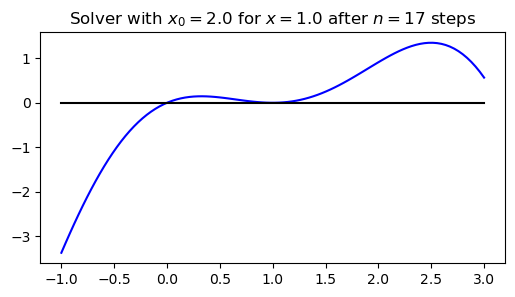

In [117]:
xx = np.linspace(-1., 3., 100)
ff = [f(x) for x in xx]
plt.figure(figsize=(6, 3))
plt.plot(xx, ff, 'b')
plt.plot(xx, 0.*xx, 'k')
plt.title(r'Solver with $x_0=%.1f$ for $x=%.1f$ after $n=%s$ steps'  %(np.round(x0,1), np.round(sols[0], 1), str(sols[2])))
plt.show()

### Study of the impact of the tolerance $\epsilon$

In [119]:
epsilons = np.linspace(1E-30, 1E-5, 200)[1:]
sols = [newton_raphson(f, x0, epsilon) for epsilon in epsilons]

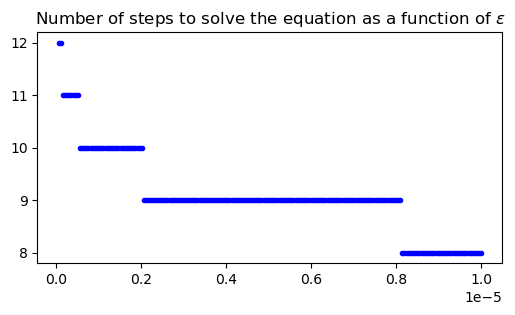

In [120]:
plt.figure(figsize=(6, 3))
plt.plot(epsilons, [s[2] for s in sols], 'b.')
plt.title(r'Number of steps to solve the equation as a function of $\epsilon$')
plt.show()

**Note:** in fact, Newton's theorem can be stated as follows:

If $f \in \mathcal{C}^2((a,b))$ for some $a<b$ and that there exists $x^* \in (a,b)$ such that $f(x^*)= 0$ and $f'(x^*)\ne 0$, then the Newton-Raphson algorithm above converges quadratically for any $x_0 \in (a,b)$ close enough to $x^*$.

# Pricing a Call option in the Black-Scholes model

In the following, we shall assume that interest rates are null.

## Reference price (closed-form), see lectures

In [125]:
from scipy.stats import norm

In [137]:
def blackscholesCall(S0, K, sigma, T):
    '''
    #Inputs:
    S0: initial stock price
    K: strike
    sigma: instantaneous volatility
    T: time to maturity
    #Output:
    Black-Scholes Call price
    '''
    sigT = sigma*np.sqrt(T)
    k = np.log(K/S0)
    dp = -k / sigT + 0.5*sigT
    dm = dp - sigT
    return S0*(norm.cdf(dp) - np.exp(k)*norm.cdf(dm))

In [138]:
S0, K, sigma, T = 100., 100., 0.2, 1.

In [139]:
print("Reference Price: ", blackscholesCall(S0, K, sigma, T))

Reference Price:  7.965567455405798


## Pricing by integration

The goal is to write a `python` function to evaluate the price of a European Call option in the Black-Scholes model by integration.
Using the `jupyter` notebook from the class, fill in the following function:

In [140]:
from scipy.integrate import quad, simps

In [144]:
def black_scholes_call_price_integ(S0, K, T, sigma):
    """
    Computes the price of a European Call option in the Black-Scholes model by integration
    S0: initial value of the stock price
    K: strike
    T: time to expiry
    sigma: instantaneous volatility

    output: European Call option price

    """
    
    def integrand_blackscholes(x, s0, K, sigma, T):
        gaussianDensity = np.exp(-.5*x*x) / np.sqrt(2.*np.pi)
        payoffFunction = np.maximum(s0*np.exp((-.5*sigma*sigma*T + sigma*np.sqrt(T)*x))-K, 0.)
        
        return payoffFunction * gaussianDensity

    return quad(integrand_blackscholes, -20., 20., args=(s0, K, sigma, T,))[0]

Check that you obtain (as in the notebook) the value of 7.965567455405798 when considering the following parameters:

In [145]:
S0, K, sigma, T = 100., 100., 0.2, 1.

In [146]:
black_scholes_call_price_integ(S0, K, T, sigma)

7.965567455359225

## Pricing by simulation

Using the representation
\begin{equation*}
S_T
 = S_0\exp\left\{-\frac{\sigma^2 T}{2} + \sigma\widetilde{N}\sqrt{T}\right\} \text{ (in distribution)},
\end{equation*}
where $\widetilde{N}\sim\mathcal{N}(0,1)$ and the approximation
$$
\mathbb{E}[f(S_T)] \approx \frac{1}{n}\sum_{i=1}^{n}f\left(S_T^{(i)}\right),
$$
for any function $f$ such that the expectation exists, where $(S_T^{(i)})_{i=1,\ldots,N}$ are independent random copies of $S_T$, write a `python` function for a European Call option price.

In [147]:
def black_scholes_call_price_simul(S0, K, T, sigma, n):
    """
    Computes the price of a European Call option in the Black-Scholes model by simulation
    S0: initial value of the stock price
    K: strike
    T: time to expiry
    sigma: instantaneous volatility
    n: number of samples (corresponding to the parameter N above)

    output: European Call option price

    """
    nn = np.random.normal(0., 1., n)
    
    S = S0*np.exp((-.5*sigma*sigma*T + sigma*np.sqrt(T)*nn))
    f = np.maximum(S - K, 0.)
    
    return np.mean(f)

Verify again that indeed you obtain (as in the notebook) the value of 7.965567455405798 when considering the following parameters:

In [148]:
S0, K, sigma, T, n = 100., 100., 0.2, 1., 100000

In [149]:
black_scholes_call_price_simul(S0, K, T, sigma, n)

7.959997205300293

Plot the value of the European Call option as a function of $n$. 

What kind of convergence do you observe?

What if $K=90$ and if $K=110$?

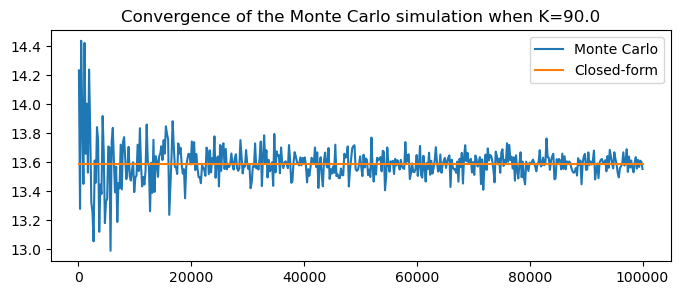

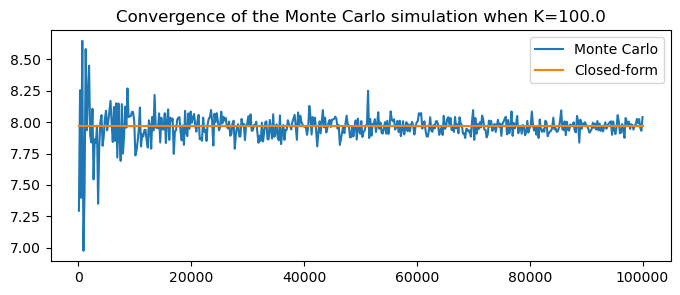

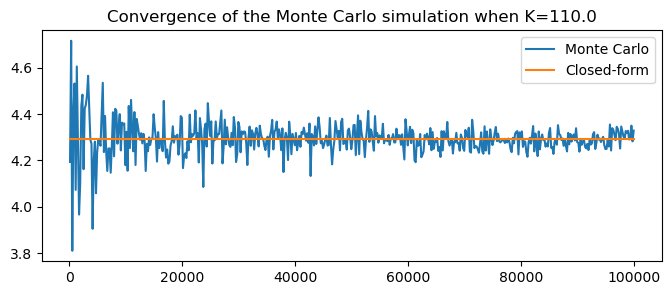

In [168]:
nn = np.linspace(100, 100000, 500).astype(int)

for K in [90., 100., 110.]:
    
    bs_simul_prices = [black_scholes_call_price_simul(S0, K, T, sigma, n) for n in nn]
    true_price = blackscholesCall(S0, K, sigma, T)
    
    plt.figure(figsize=(8, 3))
    plt.plot(nn, bs_simul_prices, label="Monte Carlo")
    plt.plot(nn, [true_price for _ in nn], label="Closed-form")
    plt.title('Convergence of the Monte Carlo simulation when K=%.1f' %K)
    plt.legend(loc="best")
    plt.show()

**Remark:** Note that here, you do not in fact need to simulate trajectories of the Brownian motion since the option is *European*, i.e. only depends on the value of the underlying stock price at maturity. For path-dependent options, however, simulations of the paths are required. This will be studied more in detail in the *Simulation methods* module next term.

## Implied volatility

Recall that in the Black-Scholes model (without interest rates), the value of a European Call option on $(S_t)_{t\geq 0}$ is given at inception by
$$
C^{\mathrm{BS}}(S_0, K, T;\sigma) = S_0\left(\mathcal{N}(d_{+}) - \mathrm{e}^{k}\mathcal{N}(d_{-})\right),
$$
where
$$
d_{\pm} = \frac{-k}{\sigma\sqrt{T}} \pm\frac{\sigma\sqrt{T}}{2}
\quad \text{ and } \quad k := \log\left(\frac{K}{S_0}\right),
$$
and where $\mathcal{N}$ denotes the Gaussian cumulative distribution function.


- For any fixed $k\in\mathbb{R}$, $T, S_0>0$, show that the map $\sigma\mapsto C^{\mathrm{BS}}(S_0, K, T;\sigma)$ is bijective;
- Compute 
$$
\lim_{\sigma\downarrow 0}C^{\mathrm{BS}}(S_0, K, T;\sigma)
$$
and 
$$
\lim_{\sigma\uparrow\infty}C^{\mathrm{BS}}(S_0, K, T;\sigma).
$$
- Write a `python` function with inputs $S_0, K, T, C$ that returns the implied volatility, solution to the equation $C^{\mathrm{BS}}(S_0, K, T;\sigma) = C$.
- You are asked to use the `derivative_f` and the `newton_raphson` functions introduced above.
- Verify that the implied volatility corresponding to $(S_0, K, T, C) = (100., 100., 1., 7.9655674)$ is equal to $20\%$.

**Note:** You may want to check (analytically and / or numerically) that the derivative function you computed above corresponds to
$$
\frac{\partial C(S_0,K,T;\sigma)}{\partial\sigma} = S_0 \varphi(d_{+})\sqrt{T},
$$
where $\varphi(\cdot)$ is the Gaussian density function.

In [169]:
from scipy.optimize import fsolve, root, minimize

def f(sigma, *args):
    S0, K, T, optionPrice = args ## optional arguments, where optionPrice is the Call option price to match
    return (blackscholesCall(S0, K, sigma, T)-optionPrice) ## define the objective equation to solve 

In [172]:
optionPrice = 3.9

impliedVol = fsolve(f, x0=0.3, args=((S0, K, T, optionPrice, )))[0]
print("Implied volatility: %.2f" %(100.*impliedVol), "%")

print("****************")
print("Verifying that Black-Scholes(implied volatility) = optionPrice")
print("Verification error (computing the difference): ", optionPrice - blackscholesCall(S0, K, impliedVol, T))

Implied volatility: 18.94 %
****************
Verifying that Black-Scholes(implied volatility) = optionPrice
Verification error (computing the difference):  -1.4654943925052066e-14


# Discrete versus continuous compounding¶

Suppose that you invest $\Pi$ GBP today in a risk-free bank account.
Considering compound interest rate yields the amount if one is earning  is
\begin{equation*}
\Pi\left(1+\frac{r}{n}\right)^{nT}.
\end{equation*}
over the period $[0,T]$, where $r$ is the annual nominal interest rate and $n$ the number of times the interest is compounded per year.
For example, if $n=1$, this is a yearly rate, for $n=2$, this is a 6-month rate, and $n=252$ corresponds to a daily rate.

**Question:** 
- Write a program computing  how much money will be compounded as a function of $\Pi, r, n, T$.
- As $n$ becomes large, compute the limit of Equation (1), and illustrate it numerically.

Available data:
- Annual rates provided by the Bank of England are available here: https://www.bankofengland.co.uk/boeapps/database/Bank-Rate.asp

- Annual rates by Bank of China can be found here: https://www.global-rates.com/en/interest-rates/central-banks/central-bank-china/pbc-interest-rate.aspx

In [173]:
def returns(P, r, T, n):
    """
    P: nominal amount
    r: risk-free rate per period
    T: maturity
    n: number of periods
    """
    return P*(1.+r/n)**(n*T)

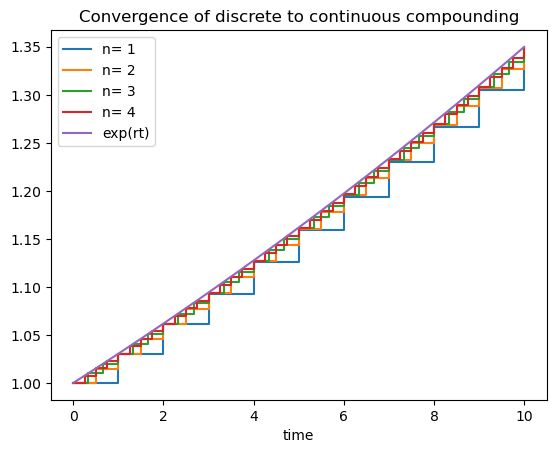

In [175]:
P0, r, T = 1, .03, 10.
nn = range(1, 5)

for n in nn:
    step = 1./float(n)
    t = 0.
    tt, pp = [], []
    for i in range(1, 1+int(n*T)):
        t = i*step
        tminus = t-step
        pminus = P0*(1.+r/n)**(n*(tminus))
        P = returns(P0, r, t, n)
        tt.extend((tminus, t, t))
        pp.extend((pminus, pminus, P))
    plt.plot(tt, pp, label='n= %d' %n)
    
plt.plot(tt, [P0*np.exp(r*t) for t in tt], label='exp(rt)')
plt.title("Convergence of discrete to continuous compounding")
plt.xlabel("time")
plt.legend(loc="best")
plt.show()